0. Import the data and declare your package dependencies.

In [2]:
import pandas as pd
import numpy as np
from plotnine import *

avocado_data = pd.read_csv("/Users/avanti/OneDrive/MASTERS/GSB544-Computing and Machine Learning/Labs/Lab Data/avocado-updated-2020.csv")

1. Briefly describe the data set. What information does it contain?

- Date: The date on which the avocado sales were recorded.
- Average Price: The average price of avocados sold during that week in a particular region.
- Total Volume: The total number of avocados sold in that region during that week.
- Year: The year when the sales data was recorded.
- Month: The month when the sales data was recorded.
- Day: The day of the month when the sales data was recorded.
- Type: The type of avocados sold (e.g., organic or conventional).
- Geography: The geographical location where the avocados were sold, often specified as cities or regions (e.g., Los Angeles, San Francisco).

In [ ]:
# to view dataset
avocado_data.head()

2. Clean the data in any way you see fit.

In [4]:
# ChatGPT helped write code below
# Removes rows with missing values
avocado_data.dropna(inplace=True)

# Check for duplicates
if avocado_data.duplicated().any():
    print("Duplicates found. Removing duplicates...")
    avocado_data.drop_duplicates(inplace=True)

# Rename PLU code columns to make them more intuitive
avocado_data = avocado_data.rename(columns={
    '4046': 'small_hass',   # 4046 refers to small Hass avocados
    '4225': 'large_hass',   # 4225 refers to large Hass avocados
    '4770': 'xlarge_hass'   # 4770 refers to extra large Hass avocados
})

# Check for missing values in the dataset
missing_values = avocado_data.isnull().sum()

3. Which major geographical region sold the most total organic, small Hass avocados in 2017?

In [5]:
# ChatGPT helped on code below
# Create a dictionary for mapping cities and states to major and metro regions
geo_to_major_region = {
    'Albany': 'Northeast',
    'Atlanta': 'Southeast',
    'Boise': 'West',
    'Boston': 'Northeast',
    'Charlotte': 'Southeast',
    'Chicago': 'Midwest',
    'Columbus': 'Midwest',
    'Denver': 'West',
    'Detroit': 'Midwest',
    'Grand Rapids': 'Midwest',
    'Houston': 'South Central',
    'Indianapolis': 'Midwest',
    'Jacksonville': 'Southeast',
    'Las Vegas': 'West',
    'Los Angeles': 'West',
    'Louisville': 'South Central',
    'Nashville': 'South Central',
    'New York': 'Northeast',
    'Orlando': 'Southeast',
    'Philadelphia': 'Northeast',
    'Pittsburgh': 'Northeast',
    'Portland': 'West',
    'Roanoke': 'Southeast',
    'Sacramento': 'West',
    'San Diego': 'West',
    'San Francisco': 'West',
    'Seattle': 'West',
    'Spokane': 'West',
    'St. Louis': 'Midwest',
    'Syracuse': 'Northeast',
    'Tampa': 'Southeast',
    'Baltimore/Washington': 'Southeast',
    'Buffalo/Rochester': 'Northeast',
    'Cincinnati/Dayton': 'Midwest',
    'Dallas/Ft. Worth': 'South Central',
    'Harrisburg/Scranton': 'Northeast',
    'Hartford/Springfield': 'Northeast',
    'Miami/Ft. Lauderdale': 'Southeast',
    'New Orleans/Mobile': 'South Central',
    'Phoenix/Tucson': 'West',
    'Raleigh/Greensboro': 'Southeast',
    'Richmond/Norfolk': 'Southeast',
    'West Tex/New Mexico': 'West',
    "Great Lakes": "Midwest",
    "Midsouth":"South Central",
    "Northeast":"Northeast",
    "Northern New England":"Northeast",
    "South Central": "South Central",
    "Southeast":"Southeast",
    "West":"West",
    "Plains":"Midwest",
    "California": "West",
    "South Carolina": "Southeast"
    }


# Create a new column 'major_region' by mapping the 'geography' column
avocado_data['major_region'] = avocado_data['geography'].map(geo_to_major_region)

# Filter data for the year 2017, organic avocados, and small Hass
avocado_2017 = avocado_data[
    (avocado_data['year'] == 2017) &
    (avocado_data['type'] == 'organic') &
    (avocado_data['small_hass'] > 0)
]

# Group by major region and sum the total volume of small Hass avocados sold
region_sales = avocado_2017.groupby('major_region')['small_hass'].sum().reset_index()

# Find the major region with the most sales
top_region = region_sales.loc[region_sales['small_hass'].idxmax()]

print("The major geographical region that sold the most total organic, small Hass avocados in 2017 is:", top_region['major_region'])
print("Total volume sold:", top_region['small_hass'])


The major geographical region that sold the most total organic, small Hass avocados in 2017 is: West
Total volume sold: 5826061.33
The major geographical region that sold the most total organic, small Hass avocados in 2017 is: West
Total volume sold: 5826061.33


4. Split the date variable into month, day, and year variables. In which month is the highest average volume of avocado sales?

In [6]:
# ChatGPT helped write code below
# Convert 'date' column to datetime objects
avocado_data['date'] = pd.to_datetime(avocado_data['date'])

# Extract month, day, and year
avocado_data['year'] = avocado_data['date'].dt.year
avocado_data['month'] = avocado_data['date'].dt.month
avocado_data['day'] = avocado_data['date'].dt.day

# Calculate the total volume for each month
monthly_volume = avocado_data.groupby('month')['total_volume'].mean()

# Find the month with the highest average volume
highest_avg_volume_month = monthly_volume.idxmax()

# Function to get month name from numeric month value
def get_month_from_number(month_value):
    if month_value == 1:
        return "January"
    elif month_value == 2:
        return "February"
    elif month_value == 3:
        return "March"
    elif month_value == 4:
        return "April"
    elif month_value == 5:
        return "May"
    elif month_value == 6:
        return "June"
    elif month_value == 7:
        return "July"
    elif month_value == 8:
        return "August"
    elif month_value == 9:
        return "September"
    elif month_value == 10:
        return "October"
    elif month_value == 11:
        return "November"
    elif month_value == 12:
        return "December"
    else:
        return "Invalid month value"

# Get the month name for the highest average volume month
highest_avg_volume_month_name = get_month_from_number(highest_avg_volume_month)

print("The month with the highest average volume of avocado sales is:", highest_avg_volume_month_name)

The month with the highest average volume of avocado sales is: May
The month with the highest average volume of avocado sales is: May


5. Which metro area geographical regions sold the most total avocados? Plot side-by-side box-plots of the total volume for only the five metro geographical regions with the highest averages for the total_volume variable.

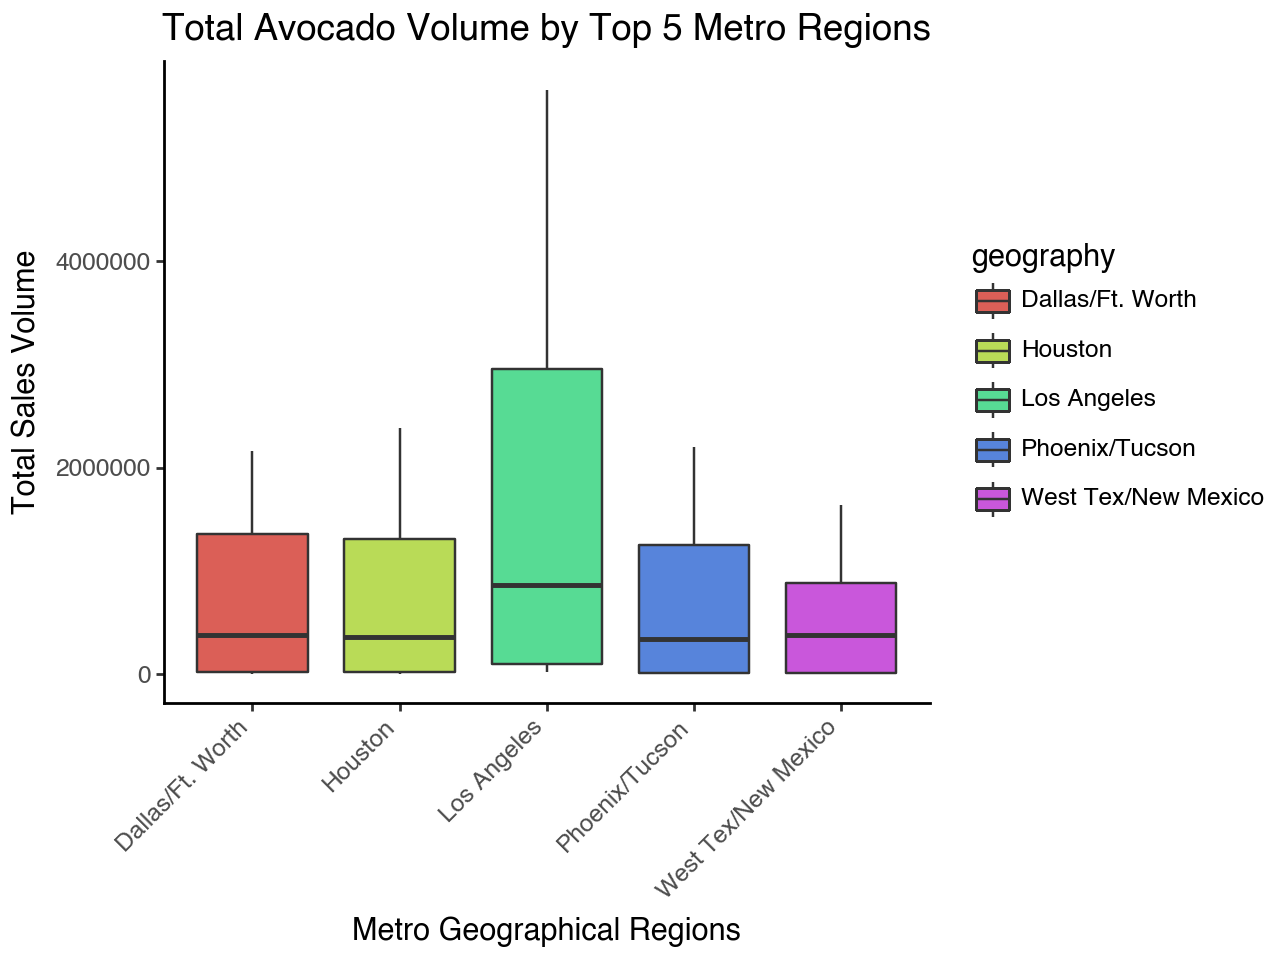

In [7]:
# Filter out major regions and states
metro_regions = avocado_data[
    ~avocado_data['geography'].isin(['California', 'South Carolina', 'Northeast', 'South Central', 'Southeast', 
    'West', 'Midwest', 'Total U.S.', 'Midsouth', 'Plains', 'Great Lakes', 'New York'])
]

# ChatGPT helped write code below
# Calculate the average total volume for each metro region
average_volume_by_region = metro_regions.groupby('geography')['total_volume'].mean()

# Sort the regions by average volume in descending order
sorted_regions = average_volume_by_region.sort_values(ascending=False)

# Get the top 5 metro regions
top_5_regions = sorted_regions.head(5).index.tolist()

# Filter the data to include only the top 5 regions
top_5_data = metro_regions[metro_regions['geography'].isin(top_5_regions)]

# Create a box plot using plotnine
(ggplot(top_5_data, aes(x='geography', y='total_volume'))
 + geom_boxplot()
 + aes(fill='geography')
 + theme_classic()
 + theme(axis_text_x=element_text(rotation=45, hjust=1))
 + labs(x='Metro Geographical Regions', y='Total Sales Volume')
 + ggtitle('Total Avocado Volume by Top 5 Metro Regions')
)


The following four California geographical regions are in this data set: "Los Angeles", "San Diego", "Sacramento", and "San Francisco".

6. From your cleaned data set, create a data set with only these California regions and answer the following questions about these California regions only.

In [8]:
ca_regions = ['Los Angeles', 'San Diego', 'Sacramento', 'San Francisco']

# filter for California avocado data
ca_avocado = avocado_data[avocado_data['geography'].isin(ca_regions)]

7. In which California regions is the price of organic versus conventional avocados most different? Support your answer with a few summary statistics AND a visualization.

Difference in Average Price (Organic - Conventional):
geography
Los Angeles      0.527778
Sacramento       0.578497
San Diego        0.684510
San Francisco    0.718954
dtype: float64
Difference in Average Price (Organic - Conventional):
geography
Los Angeles      0.527778
Sacramento       0.578497
San Diego        0.684510
San Francisco    0.718954
dtype: float64


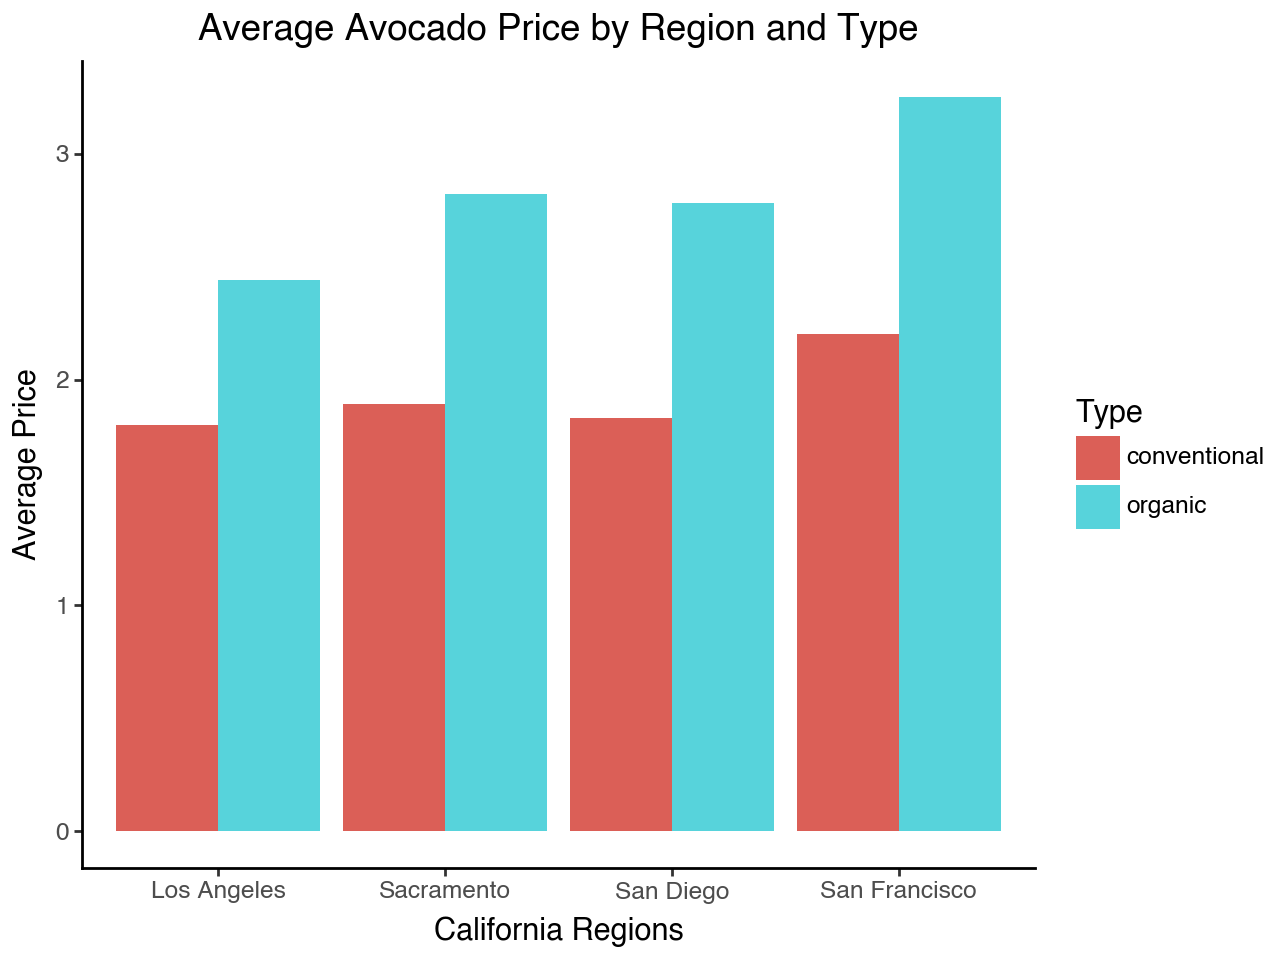

In [9]:
# ChatGPT helped write code below
# Group data by region and type (organic/conventional) and calculate the average price
avg_price_by_region_type = ca_avocado.groupby(['geography', 'type'])['average_price'].mean().unstack()

# Calculate the difference in average price between organic and conventional avocados for each region
price_difference = avg_price_by_region_type['organic'] - avg_price_by_region_type['conventional']

# Print the difference in average price for each region
print("Difference in Average Price (Organic - Conventional):")
print(price_difference)

# Visualize the price difference using a bar chart
(ggplot(ca_avocado, aes(x='geography', y='average_price', fill='type'))
 + geom_col(position='dodge')
 + theme_classic()
 + labs(x='California Regions', y='Average Price', fill='Type')
 + ggtitle('Average Avocado Price by Region and Type')
)

8. The following plot shows, for all four California regions, the proportion of the average Hass avocado sales that are small, large, or extra large; conventional vs. organic. Recreate the plot; you do not have to replicate the exact finishing touches - e.g., color, theme - but your plot should resemble the content of this plot.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


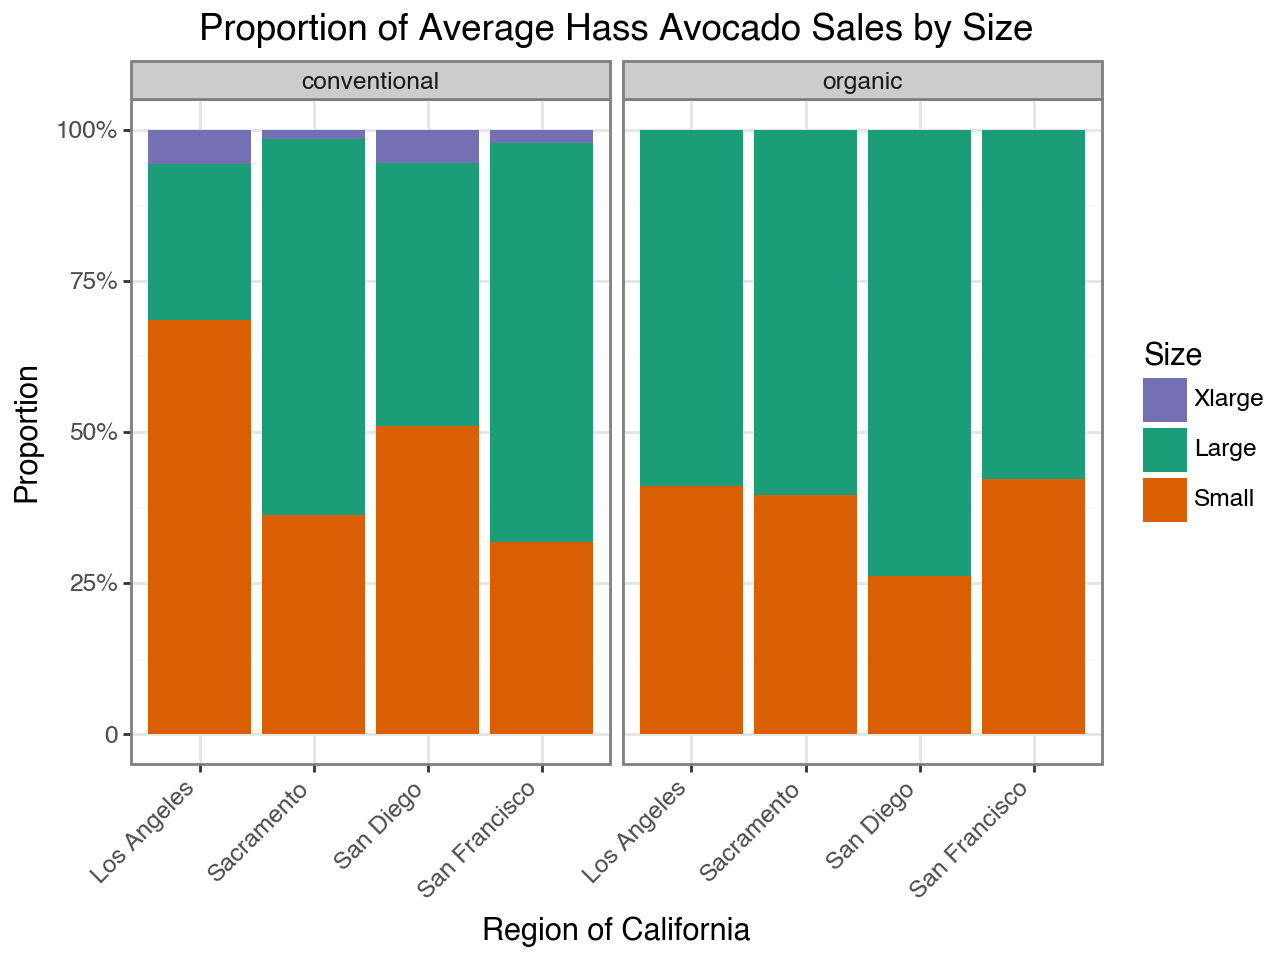

In [10]:
plot_data = ca_avocado[['geography', 'type', 'small_hass', 'large_hass', 'xlarge_hass']]

# Melting the columns to visualize appropriately
melted = plot_data.melt(id_vars=['geography', 'type'], var_name='Size', value_name='Proportion')

# Rename sizes to include '_hass' suffix
melted['Size'] = melted['Size'].replace({'small': 'small_hass', 'large': 'large_hass', 'xlarge': 'xlarge_hass'})

# Achieving the proportion to be displayed in terms of 0-1
melted['Proportion'] = melted.groupby(['geography', 'type'])['Proportion'].transform(lambda x: x / x.sum())

# Change the order of the Size variable to the specified order
size_order = ['xlarge_hass', 'large_hass', 'small_hass']  # Define the order you want
melted['Size'] = pd.Categorical(melted['Size'], categories=size_order, ordered=True)

# Create the stacked bar chart with custom legend labels
plot = (ggplot(melted, aes(x='geography', y='Proportion', fill='Size'))
        + geom_bar(stat='identity')
        + facet_wrap('~type')
        + labs(title='Proportion of Average Hass Avocado Sales by Size', x='Region of California', y='Proportion')
        + scale_fill_manual(values=['#7570B3', '#1B9E77', '#D95F02'], 
                            labels=['Xlarge', 'Large', 'Small'])  # Custom labels for legend
        + theme_bw()
        + scale_y_continuous(breaks=([0, .25, .5, .75, 1]), labels=[0, '25%', '50%', '75%', '100%'])
        + theme(axis_text_x=element_text(rotation=45, hjust=1))
)

Find or make a data set with house prices for these four California regions. Join this data set with your California avocado data set.

Use your new joined data set to make an argument about the relationship between house prices and avocado prices/sales.

Support your argument with a plot.

The average home prices in California have shown a significant upward trend from 2015 to 2020 across major regions, including Los Angeles, Sacramento, San Diego, and San Francisco. Similarly, the total volume of avocado sales has fluctuated over the same period. While there is no direct evidence that rising house prices lead to increased avocado sales, the two trends may be interrelated through economic and consumer behavior dynamics. The two plots show a similar increase in house prices and avocado sales across all four California regions.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


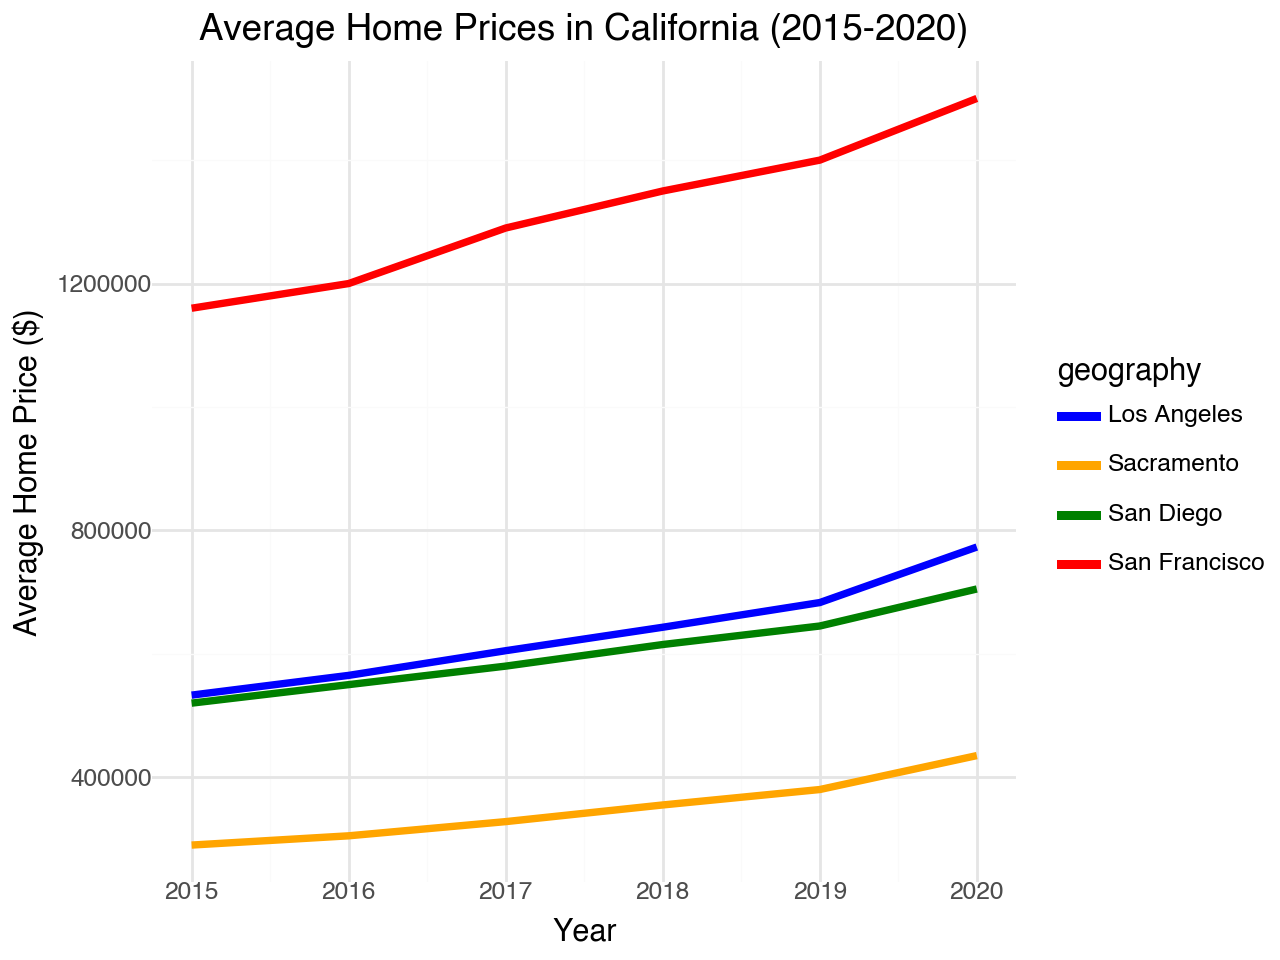

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


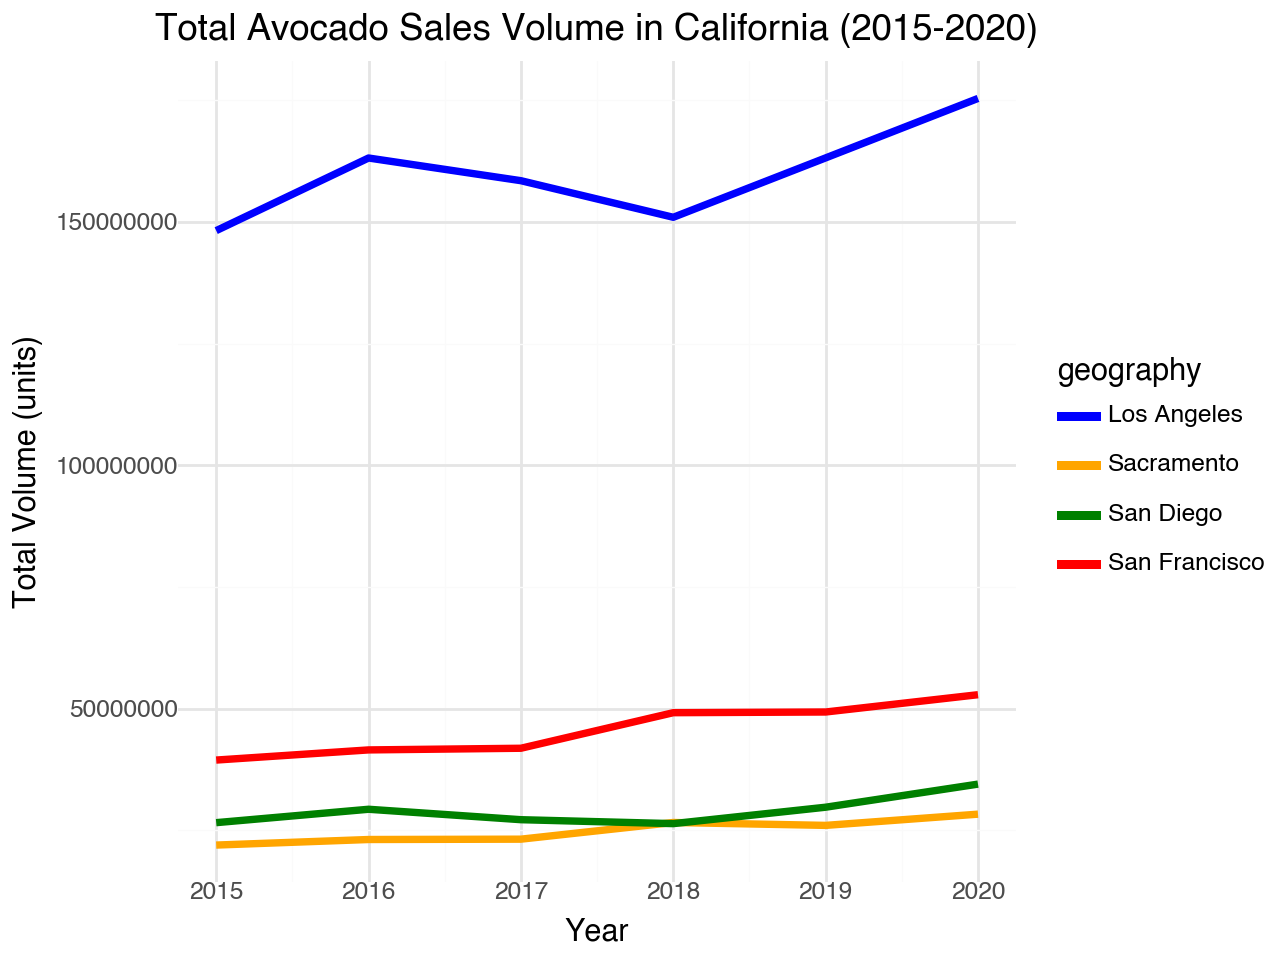

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


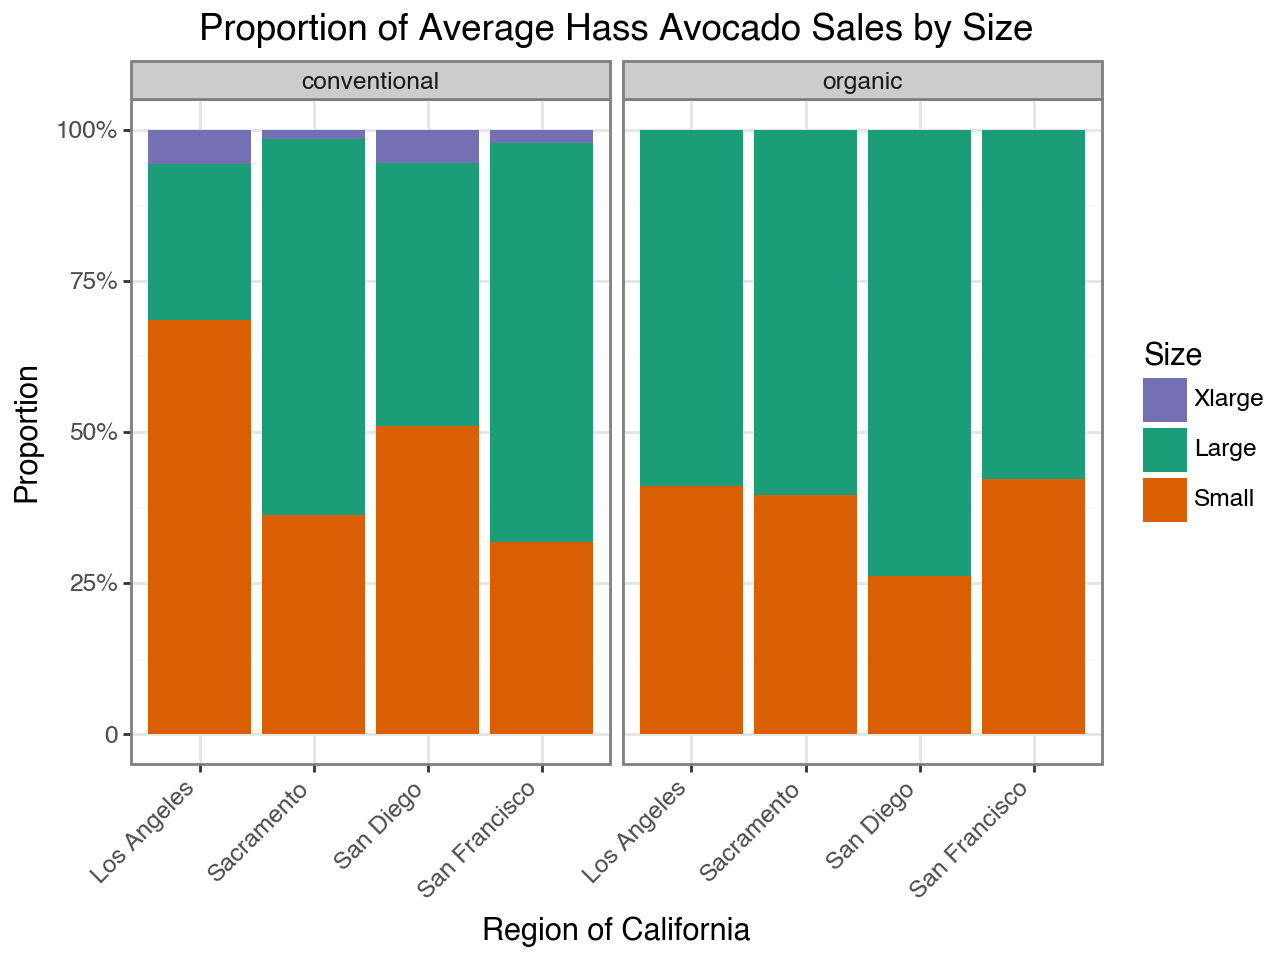

In [11]:
# data consolidated from redfin and zillow
data = {
    "year": [2015, 2016, 2017, 2018, 2019, 2020],
    "los_angeles": [533000, 565000, 605000, 643000, 683000, 773000],
    "sacramento": [290000, 305000, 328000, 355000, 380000, 435000],
    "san_diego": [520000, 550000, 580000, 615000, 645000, 705000],
    "san_fransisco": [1160000, 1200000, 1290000, 1350000, 1400000, 1500000]
}

avg_home_prices_ca_regions = pd.DataFrame(data)

avg_home_prices_ca_regions

# Group data by region and year, calculating total volume of small Hass avocados sold
ca_avocado_grouped = ca_avocado.groupby(['year', 'geography'])['total_volume'].sum().reset_index()

# Melt avocado data for plotting
ca_avocado_melted = ca_avocado_grouped.groupby(['year', 'geography'])['total_volume'].sum().reset_index()

# Melt the avg_home_prices_ca_regions DataFrame to make it suitable for merging
avg_home_prices_ca_regions_melted = avg_home_prices_ca_regions.melt(id_vars=["year"], 
                                                                     var_name="geography", 
                                                                     value_name="avg_home_price")

# Replace underscores in 'geography' for consistency
avg_home_prices_ca_regions_melted['geography'] = avg_home_prices_ca_regions_melted['geography'].replace({
    'los_angeles': 'Los Angeles', 
    'sacramento': 'Sacramento', 
    'san_diego': 'San Diego', 
    'san_fransisco': 'San Francisco'
})

home_price_plot = (
    ggplot(avg_home_prices_ca_regions_melted) +
    aes(x='year', y='avg_home_price', color='geography') +
    geom_line(size=1.5) +
    labs(title='Average Home Prices in California (2015-2020)',
         y='Average Home Price ($)',
         x='Year') +
    scale_color_manual(values=['blue', 'orange', 'green', 'red']) +  # Customize colors
    theme_minimal()
)

avocado_sales_plot = (
    ggplot(ca_avocado_melted) +
    aes(x='year', y='total_volume', color='geography') +
    geom_line(size=1.5) +
    labs(title='Total Avocado Sales Volume in California (2015-2020)',
         y='Total Volume (units)',
         x='Year') +
    scale_color_manual(values=['blue', 'orange', 'green', 'red']) +  # Customize colors
    theme_minimal()
)